In [76]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [77]:
# Import Data
schema = {'target':int, 'id':int, 'date':str, 'flag':str, 'user':str, 'text':str}

df = pd.read_csv("./data/training.1600000.processed.noemoticon.csv", encoding="latin1", header=None, names=schema)

df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


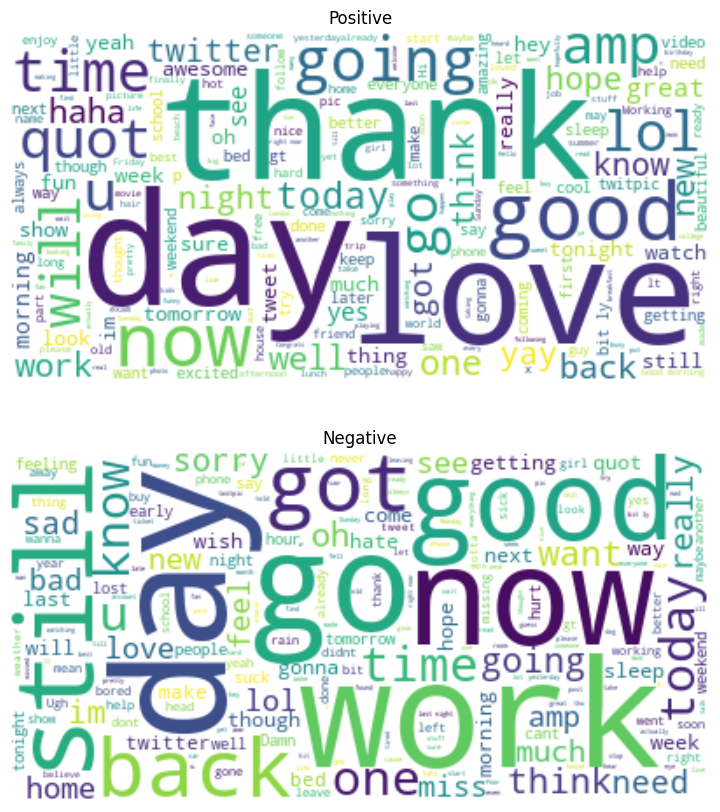

In [82]:
sampled_positive = df[df['target'] == 4].sample(1000)
sampled_negative = df[df['target'] == 0].sample(1000)
text_positive = sampled_positive['text'].str.cat(sep=' ')
text_negative = sampled_negative['text'].str.cat(sep=' ')

wordcloud_positive = WordCloud(background_color='white', max_words=200).generate(text_positive)
wordcloud_negative = WordCloud(background_color='white', max_words=200).generate(text_negative)
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive')

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative')
plt.show()


In [31]:
# Split Text
df['text_split'] = df['text'].str.split()
word_df = df.explode('text_split', ignore_index=True)
word_df.head()

,target,id,date,flag,user,text,text_split
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",@switchfoot
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http://twitpic.com/2y1zl
2,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",-
3,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","Awww,"
4,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",that's


In [79]:
# Group by Text and Count Frequency
word_df['text_split'] = word_df['text_split'].str.lower()
groupby_text = word_df.groupby('text_split')['target'].value_counts().unstack(fill_value=0)
groupby_text.rename(columns={0:'negative', 4:'positive'}, inplace=True)
groupby_text = groupby_text.sort_values(by='positive', ascending=False)
groupby_text.head(30)


target,negative,positive
text_split,,
i,459954,286681
the,255656,263078
to,310288,250026
a,180178,196244
you,82836,154930
and,150065,145610
my,188442,124404
for,98058,115993
is,125430,105656


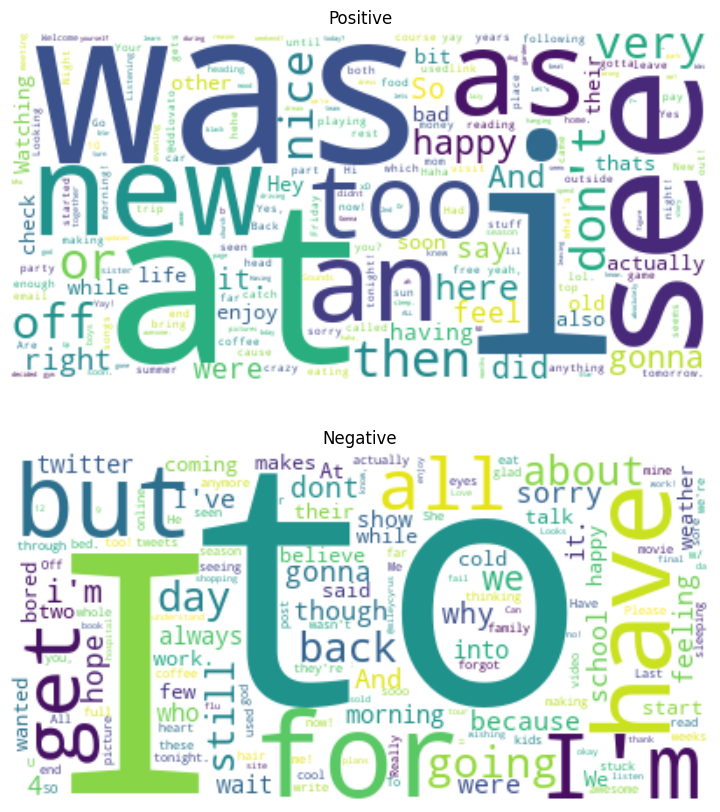

In [75]:
# Sampling
sampled_positive = groupby_text[groupby_text['positive'] > 100].positive.sample(n=1000)
sampled_negative = groupby_text[groupby_text['negative'] > 100].negative.sample(n=1000)

sampled_positive.to_csv('./data/sampled_positive.csv')
sampled_negative.to_csv('./data/sampled_negative.csv')

wordcloud_positive = WordCloud(background_color='white', max_words=200).generate_from_frequencies(sampled_positive)
wordcloud_negative = WordCloud(background_color='white', max_words=200).generate_from_frequencies(sampled_negative)

# show 2 wordclouds vertically
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive')

plt.subplot(2, 1, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative')
plt.show()


